# Loading Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

# Loading Dataset

In [3]:
df = pd.read_csv(r'D:\Programacion\Datasets\rumanian_dataset.csv')

In [18]:
df

,Interval,ROPEX_DAM_H_[Euro/MWh],Traded_Volume_[MWh],Traded_Buy_Volume_[MWh],Traded_Sell_Volume_[MWh],Date
0,1,45.07,2429.6,2429.6,2081.7,2015-01-01
1,2,44.16,2246.3,2246.3,2044.4,2015-01-01
2,3,39.17,2348.4,2348.4,1901.6,2015-01-01
3,4,26.93,2312.2,2312.2,1696.7,2015-01-01
4,5,20.94,2360.8,2360.8,1504.0,2015-01-01
...,...,...,...,...,...,...
82146,20,132.66,3371.1,3371.1,2140.8,2024-05-15
82147,21,167.52,3460.5,3460.5,2071.0,2024-05-15
82148,22,138.44,3200.2,3200.2,1943.6,2024-05-15
82149,23,85.76,2271.5,2271.5,1632.7,2024-05-15


In [5]:
df.drop(df.iloc[:,:2].columns.tolist() + ['Trading Zone'],axis=1,inplace=True)
df.columns = ['_'.join(x.split()) for x in df.columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82151 entries, 0 to 82150
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Interval                  82151 non-null  int64  
 1   ROPEX_DAM_H_[Euro/MWh]    82151 non-null  float64
 2   Traded_Volume_[MWh]       82151 non-null  float64
 3   Traded_Buy_Volume_[MWh]   82151 non-null  float64
 4   Traded_Sell_Volume_[MWh]  82151 non-null  float64
 5   Date                      82151 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 3.8+ MB


In [7]:
df.describe()

,Interval,ROPEX_DAM_H_[Euro/MWh],Traded_Volume_[MWh],Traded_Buy_Volume_[MWh],Traded_Sell_Volume_[MWh]
count,82151.000000,82151.000000,82151.000000,82151.000000,82151.000000
mean,12.499970,81.167797,2693.388833,2500.585591,2457.000723
std,6.922344,90.323545,610.697062,717.621943,640.409620
min,1.000000,-106.360000,468.200000,130.900000,56.900000
25%,6.500000,34.000000,2293.300000,2104.700000,2050.500000
50%,12.000000,50.510000,2687.900000,2548.800000,2449.600000
75%,18.000000,87.445000,3098.300000,2984.700000,2858.150000
max,25.000000,964.210000,5052.900000,4802.500000,5052.900000


# Cleaning

In [8]:
# duplicates
df.duplicated().sum()

0

In [9]:
# invalid values
print(f'Intervals min and max: {df.Interval.min()} & {df.Interval.max()}')

Intervals min and max: 1 & 25


In [10]:
df.Date = pd.to_datetime(df.Date,errors='coerce')

In [11]:
#Missing values
df.isna().sum()

Interval                    0
ROPEX_DAM_H_[Euro/MWh]      0
Traded_Volume_[MWh]         0
Traded_Buy_Volume_[MWh]     0
Traded_Sell_Volume_[MWh]    0
Date                        0
dtype: int64

# EDA

In [12]:
sns.set_style('darkgrid') 

Text(0.5, 0.98, 'Algunas relaciones de los Intervalos')

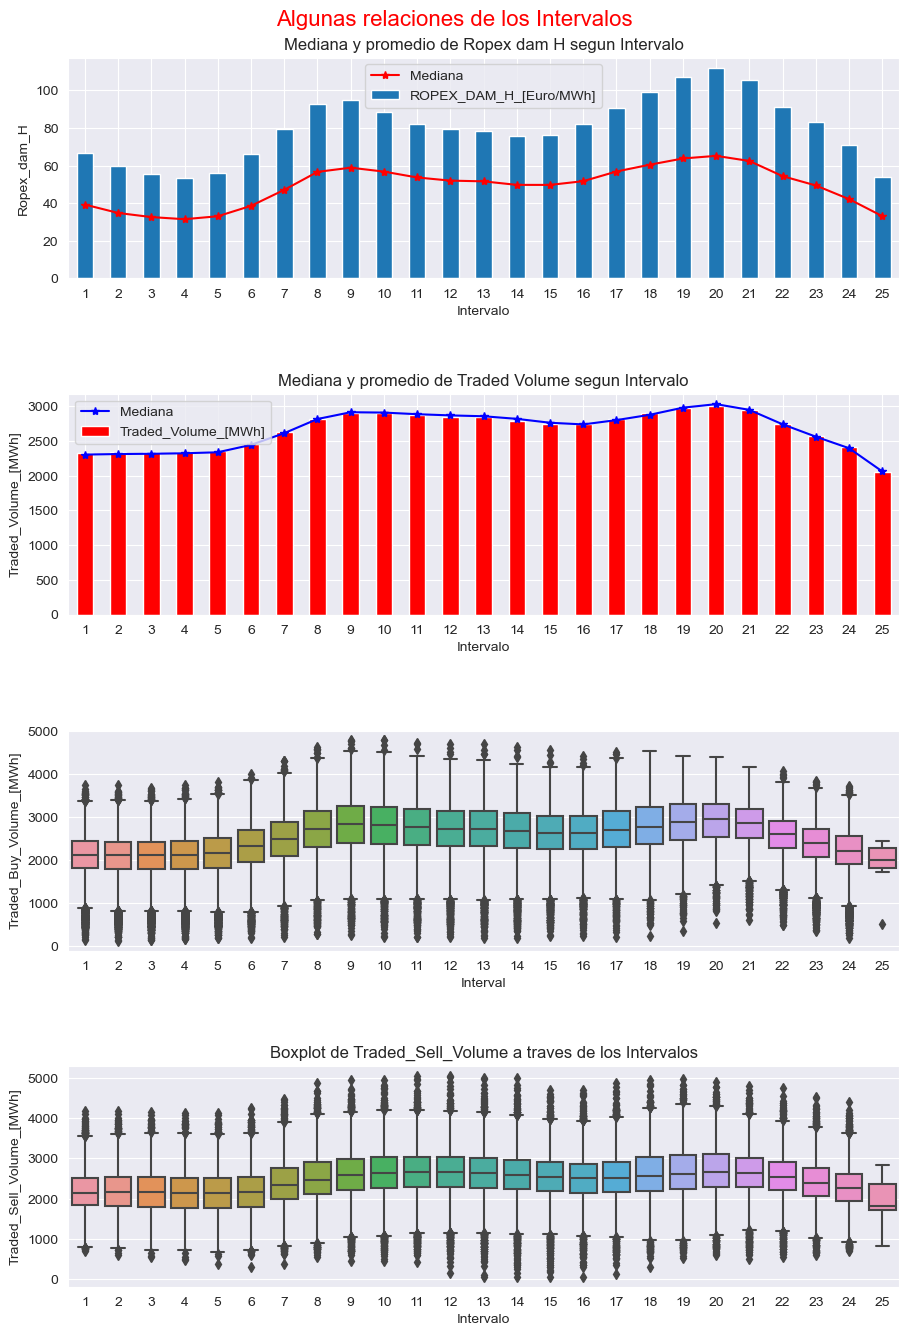

In [29]:
fig,ax = plt.subplots(4,1,figsize=(10,14))

df.groupby('Interval')['ROPEX_DAM_H_[Euro/MWh]'].mean().plot.bar(xlabel='Intervalo',
                                                                ylabel='Ropex_dam_H',
                                                                 title='Mediana y promedio de Ropex dam H segun Intervalo',
                                                                ax=ax[0])
df.groupby('Interval')['ROPEX_DAM_H_[Euro/MWh]'].median().reset_index(drop=True).plot(ax=ax[0],color='r',marker='*',label='Mediana')
ax[0].legend()

df.groupby('Interval')['Traded_Volume_[MWh]'].mean().plot.bar(xlabel='Intervalo',
                                                                ylabel='Traded_Volume_[MWh]',
                                                                 title='Mediana y promedio de Traded Volume segun Intervalo',
                                                                ax=ax[1],
                                                              color='r')
df.groupby('Interval')['Traded_Volume_[MWh]'].median().reset_index(drop=True).plot(ax=ax[1],marker='*',color='blue',label='Mediana')
ax[1].legend()

sns.boxplot(x=df.Interval,y=df['Traded_Buy_Volume_[MWh]'],ax=ax[2])
plt.xlabel('Intervalo')
plt.title('Boxplot de Traded_Buy_Volume a traves de los Intervalos')

sns.boxplot(x=df.Interval,y=df['Traded_Sell_Volume_[MWh]'],ax=ax[3])
plt.xlabel('Intervalo')
plt.title('Boxplot de Traded_Sell_Volume a traves de los Intervalos')

plt.tight_layout(pad=4)
fig.suptitle('Algunas relaciones de los Intervalos',size=16,color='r')